In [1]:
import pandas as pd
import numpy as np
from math import log2

In [187]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)

In [232]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [233]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [235]:
newDataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,250.500000,25.466000,28.318040,85300.200000,1.276260e+05,1.527757,1.888000,30.296000,4.347600e+05,286080.000000,70.694920,322.920000,3.235140
std,144.481833,16.552366,23.670543,15779.259489,1.051774e+05,1.368885,0.315682,12.072775,2.533407e+05,139004.597609,16.774328,70.249153,0.551974
min,1.000000,1.000000,1.490000,52300.000000,1.800000e+04,0.211300,1.000000,10.000000,3.500000e+04,25000.000000,12.060000,120.000000,1.870000
25%,125.750000,8.000000,10.472500,74875.000000,6.975000e+04,0.835100,2.000000,20.000000,2.650000e+05,185000.000000,60.000000,360.000000,2.870000
50%,250.500000,25.000000,19.655000,83300.000000,1.055000e+05,1.227650,2.000000,30.000000,3.600000e+05,265000.000000,74.295000,360.000000,3.120000
75%,375.250000,39.250000,39.592500,95450.000000,1.552500e+05,1.882550,2.000000,41.000000,5.550000e+05,375000.000000,80.000000,360.000000,3.500000
max,500.000000,55.000000,98.950000,139800.000000,1.560000e+06,22.065100,2.000000,50.000000,1.915000e+06,765000.000000,97.000000,360.000000,6.000000


In [246]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [229]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [245]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
1,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
2,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
3,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
4,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
5,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


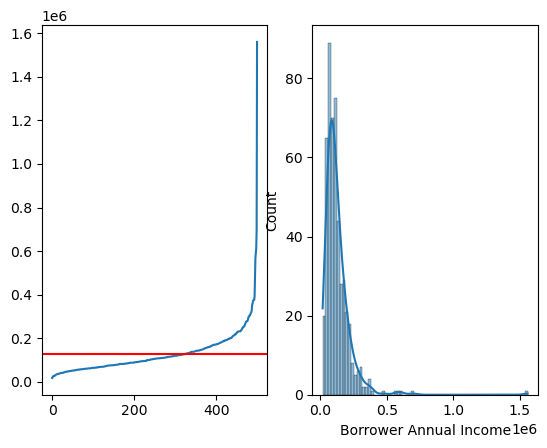

In [302]:
import matplotlib.pyplot as myplot
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= mean, color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

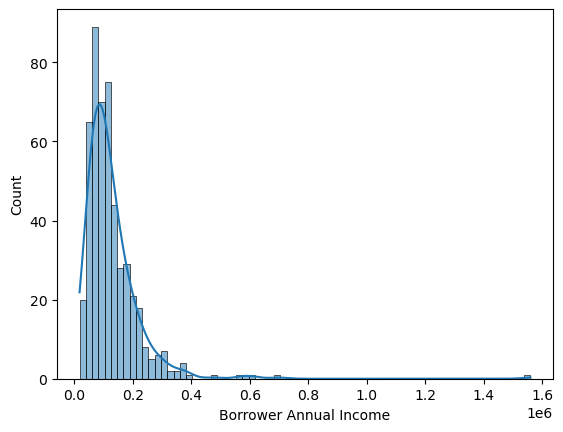

In [300]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [243]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
373,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [284]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

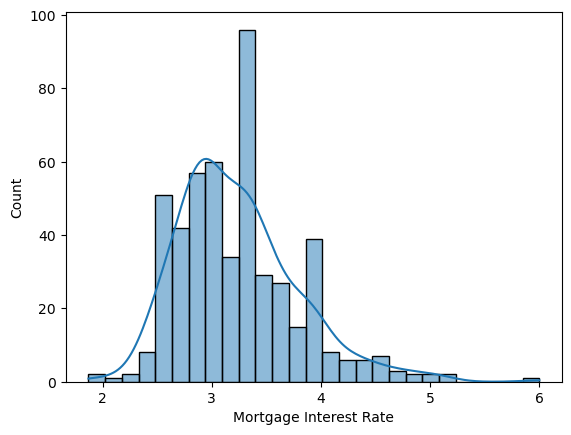

In [305]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

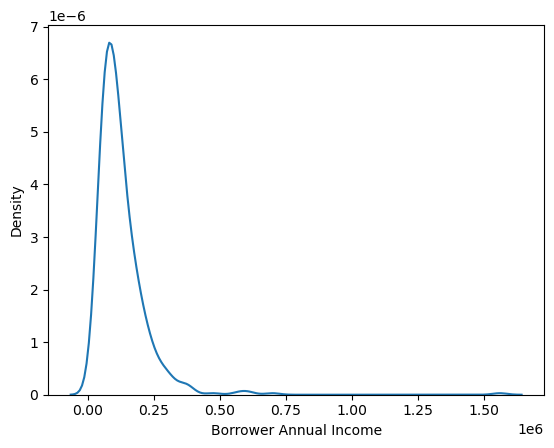

In [293]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [304]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
6,6,24,29.18,124900,27000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
7,7,8,81.63,100000,27000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
8,8,53,39.06,74600,30000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
9,9,36,98.09,96500,31000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
10,10,48,41.47,80000,32000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
11,11,34,40.18,96500,33000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
12,12,25,41.27,114000,34000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
13,13,6,84.75,127900,35000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
14,14,26,33.01,79700,36000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
15,15,6,34.80,127900,36000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [315]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [316]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [388]:
bins=pd.qcut(dataSet["Borrower Annual Income"],q=4, retbins=True)
bins


(1       (105500.0, 155250.0]
 2      (155250.0, 1560000.0]
 3       (17999.999, 69750.0]
 4       (105500.0, 155250.0]
 5       (105500.0, 155250.0]
                ...          
 496    (155250.0, 1560000.0]
 497      (69750.0, 105500.0]
 498    (155250.0, 1560000.0]
 499     (105500.0, 155250.0]
 500     (17999.999, 69750.0]
 Name: Borrower Annual Income, Length: 500, dtype: category
 Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]],
 Index([18000.0, 69750.0, 105500.0, 155250.0, 1560000.0], dtype='object', name='Borrower Annual Income'))

In [386]:
dataSet["Borrower Annual Income"].min()

18000

In [451]:
#income_data=pd.concat([newDataSet["Borrower Annual Income"], bins], axis=1)
#income_data.columns=["Income", "Category"]
#income_data

In [449]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_34965/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 64000.0, closed='right'), Interval(64000.0, 88600.0, closed='right'), Interval(88600.0, 120000.0, closed='right'), Interval(120000.0, 172000.0, closed='right'), Interval(172000.0, 1560000.0, closed='right')])

In [462]:
keys=grouped.groups.keys()
keys=list(keys)
import numpy as np
keys=np.array(keys)
keys=keysArray.reshape((2,2))
keys

array([[Interval(17999.999, 69750.0, closed='right'),
        Interval(69750.0, 105500.0, closed='right')],
       [Interval(105500.0, 155250.0, closed='right'),
        Interval(155250.0, 1560000.0, closed='right')]], dtype=object)

In [444]:
grouped.groups

{(17999.999, 64000.0]: [3, 9, 12, 26, 27, 44, 45, 50, 57, 61, 78, 86, 95, 98, 105, 110, 113, 126, 127, 134, 137, 150, 153, 159, 167, 183, 192, 196, 201, 205, 221, 225, 241, 244, 258, 259, 263, 269, 272, 273, 274, 276, 281, 285, 286, 292, 294, 307, 310, 314, 316, 319, 324, 326, 333, 336, 340, 342, 343, 348, 353, 357, 360, 361, 363, 365, 368, 371, 375, 377, 386, 388, 408, 409, 415, 418, 419, 421, 424, 429, 433, 438, 439, 440, 441, 443, 446, 447, 448, 451, 457, 459, 460, 462, 463, 464, 470, 472, 480, 485, ...], (64000.0, 88600.0]: [13, 18, 31, 36, 54, 59, 60, 67, 81, 82, 84, 89, 97, 100, 101, 103, 104, 107, 119, 120, 124, 128, 129, 139, 144, 161, 163, 169, 170, 181, 184, 187, 202, 210, 211, 214, 218, 222, 235, 245, 246, 247, 249, 252, 254, 256, 257, 260, 264, 265, 267, 288, 290, 295, 297, 299, 300, 302, 306, 311, 315, 318, 320, 321, 327, 332, 338, 339, 351, 362, 378, 384, 385, 390, 393, 400, 401, 405, 420, 422, 425, 427, 428, 434, 444, 445, 450, 452, 454, 466, 475, 476, 481, 483, 490, 493

In [432]:
grouped.get_group(pd.Interval(17999.999, 64000.0, closed='right'))

,Income,Category
3,25000,"(17999.999, 64000.0]"
9,31000,"(17999.999, 64000.0]"
12,34000,"(17999.999, 64000.0]"
26,41000,"(17999.999, 64000.0]"
27,41000,"(17999.999, 64000.0]"
...,...,...
480,298000,"(17999.999, 64000.0]"
485,317000,"(17999.999, 64000.0]"
486,320000,"(17999.999, 64000.0]"
487,328000,"(17999.999, 64000.0]"


In [463]:
keys

array([[Interval(17999.999, 69750.0, closed='right'),
        Interval(69750.0, 105500.0, closed='right')],
       [Interval(105500.0, 155250.0, closed='right'),
        Interval(155250.0, 1560000.0, closed='right')]], dtype=object)

THe axes object has [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
outer array is  0
THe index of inner array is  0
THe index of inner array is  1
outer array is  1
THe index of inner array is  0


/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_34965/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_34965/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()
/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_34965/2631311528.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  myplot.legend()


THe index of inner array is  1


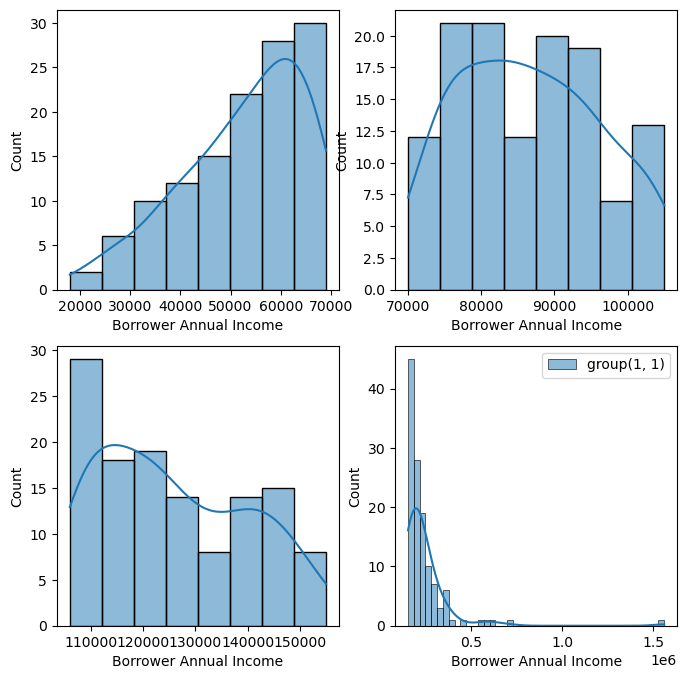

In [485]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [482]:
first_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', first_group.min(), 'the max is ', first_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


the min of 1st group is 18000 the max is  69000 

the min of 1st group is 70000 the max is  105000 

the min of 1st group is 106000 the max is  155000 

the min of 1st group is 156000 the max is  1560000 



In [489]:
import math
math.sqrt(first_group.var())

12369.097810477582

In [495]:
pd.DataFrame(first_group).info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 3 to 500
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Borrower Annual Income  125 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [498]:
first_group=first_group.astype(float)

In [512]:
emperical_stats=fourth_group.describe()
emperical_stats

count    1.250000e+02
mean     2.454000e+05
std      1.507248e+05
min      1.560000e+05
25%      1.760000e+05
50%      2.030000e+05
75%      2.560000e+05
max      1.560000e+06
Name: Borrower Annual Income, dtype: float64

In [503]:
fourth_group=fourth_group.astype(float)
fourth_group.describe()

count    1.250000e+02
mean     2.454000e+05
std      1.507248e+05
min      1.560000e+05
25%      1.760000e+05
50%      2.030000e+05
75%      2.560000e+05
max      1.560000e+06
Name: Borrower Annual Income, dtype: float64

In [509]:
cv_first_group=first_group.std()/first_group.mean() *100
cv_first_group

23.5046705124612

In [513]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

(0.0, 400000.0)

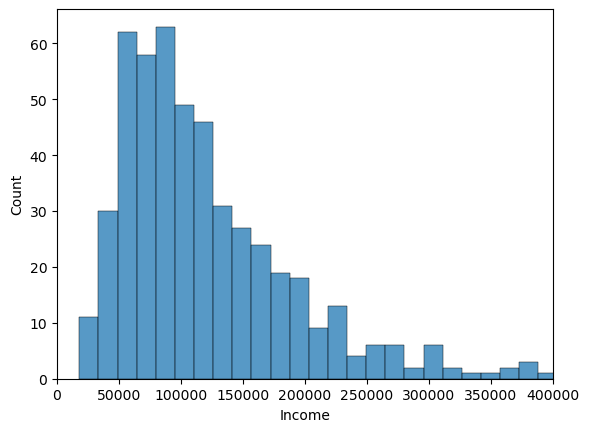

In [521]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)